In [71]:
#retirar warnings
import warnings
warnings.filterwarnings('ignore')

In [72]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_excel("./Dados/Fonte dos Dados.xlsx")
df.head()

,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,Ativos com Médio Nível Educacional,Ativos com Alto Nível Educacional,Percentual de estrangeiros ao total de Trabalhadores,PIB Municipal,Estudantes Ensino primário,Estudantes Ensino secundário,Estudantes Ensino superior,Óbitos até 1 ano de idade por milhares de habitantes,Óbitos por milhares de habitantes,Nascidos por milhares de habitantes,Hospitais por milhares de habitantes,Médicos por milhares de habitantes,% de pobres,IDH,Percentual de trabalhadores especializados,"Valores de Importação por 10,000 habitantes","Valores de Exportação por 10,000 habitantes","Número de hotéis por 10,000 habitantes",Percentual de empresas do setor primário em relação ao total,Percentual de empresas do setor secundário em relação ao total,Percentual de empresas do setor terciário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes"
0,Acrelândia,Acre,12538,6.93,52.92,43.04,4.04,48.34,0.00,75.34,19.52,5.14,0.08,1.221749e+08,3382,643,27,0.3,2.8,18.1,0.0,0.00,36.56,0.81,4.06,0.00,0.00,0.00,6.56,18.03,75.41,8.86,21.53,34.07,994.67,2654247.23,19.17,9.62,12.12,0.0
1,Assis Brasil,Acre,6072,1.22,55.58,40.07,4.35,65.30,2.39,66.83,26.93,6.23,14.19,4.205170e+07,2210,473,102,0.3,2.5,63.2,0.0,0.17,44.09,0.77,5.44,0.00,0.00,3.29,0.00,0.00,100.00,0.60,0.00,36.25,1163.49,2113108.99,10.57,7.44,17.79,0.0
2,Brasiléia,Acre,21398,5.46,51.88,42.76,5.37,70.02,21.27,70.67,21.29,8.04,2.00,1.906333e+08,4839,1297,309,0.1,4.2,25.0,0.0,0.14,35.22,0.77,8.55,14731.75,2119542.01,0.93,9.23,6.92,83.85,2.53,17.70,33.83,818.65,2376384.22,11.13,5.96,14.58,0.0
3,Bujari,Acre,8471,2.79,52.71,42.60,4.69,44.07,0.16,71.05,22.05,6.90,1.07,8.616439e+07,2348,487,53,0.4,0.5,21.0,0.0,0.00,37.61,0.77,5.52,0.00,0.00,0.00,40.00,6.67,53.33,31.34,1.04,29.40,897.30,2668575.85,9.76,3.41,5.78,0.0
4,Capixaba,Acre,8798,5.17,53.92,41.92,4.16,44.60,0.82,77.90,16.60,5.49,0.00,1.083468e+08,2539,327,37,0.1,0.8,16.8,0.0,0.00,35.00,0.79,5.30,0.00,93536.03,0.00,12.50,25.00,62.50,4.30,30.37,10.32,843.49,2803488.37,6.35,4.14,7.73,0.0


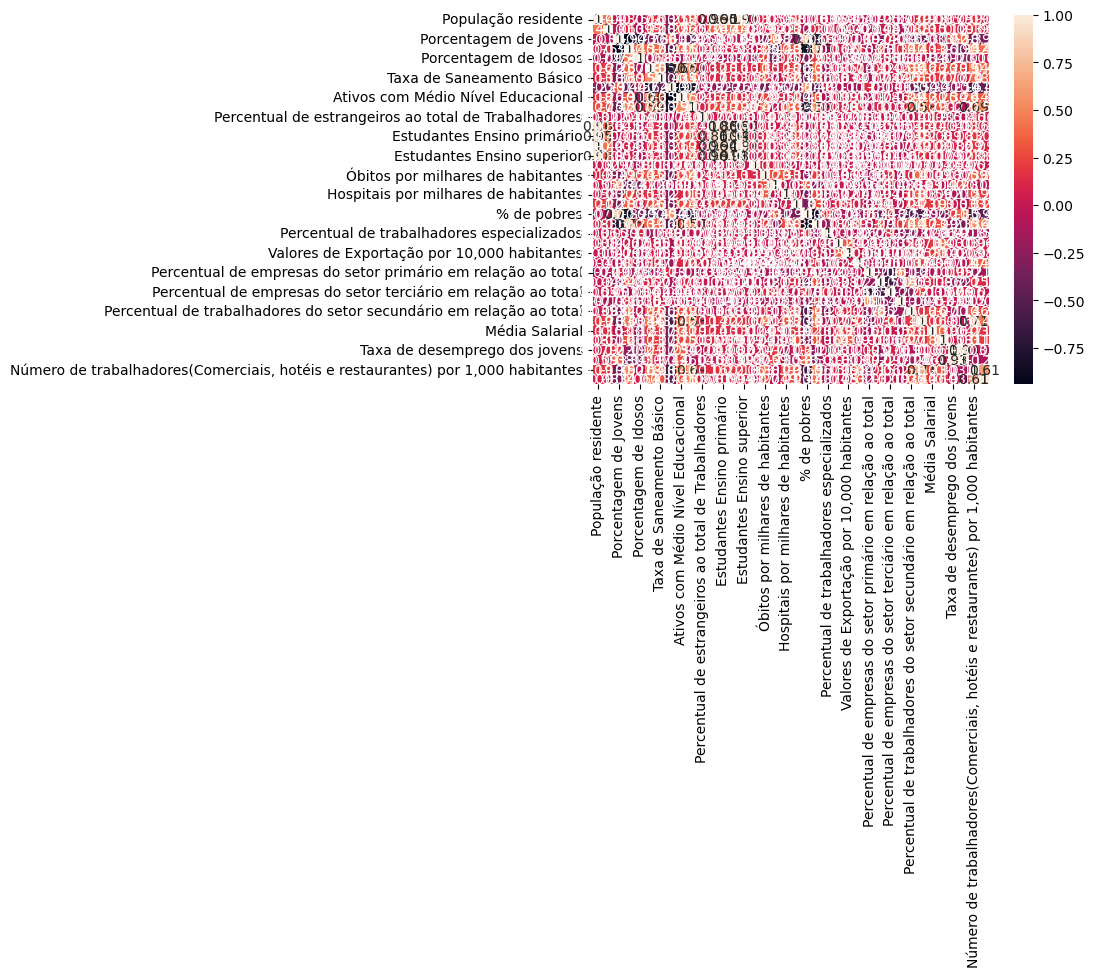

In [73]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True);

In [74]:
df.corr()["Produtividade"].sort_values()

% de pobres                                                                       -0.311859
Ativos com Baixo Nível Educacional                                                -0.309256
Porcentagem de Jovens                                                             -0.157639
Porcentagem de Idosos                                                             -0.111456
Percentual de empresas do setor terciário em relação ao total                     -0.065714
Percentual de trabalhadores especializados                                        -0.063779
Nascidos por milhares de habitantes                                               -0.041535
Percentual de empresas do setor primário em relação ao total                       0.010218
Óbitos até 1 ano de idade por milhares de habitantes                               0.024284
Taxa de desemprego                                                                 0.030530
Percentual de estrangeiros ao total de Trabalhadores                            

In [75]:
correlacao = df.corr() #criando uma matriz de correlação
correlacao_filtrada = correlacao[correlacao["Produtividade"].abs()>0.3]["Produtividade"]
correlacao_filtrada

Ativos com Baixo Nível Educacional                                                -0.309256
Ativos com Alto Nível Educacional                                                  0.305502
Médicos por milhares de habitantes                                                 0.304765
% de pobres                                                                       -0.311859
Valores de Importação por 10,000 habitantes                                        0.400287
Valores de Exportação por 10,000 habitantes                                        0.339172
Média Salarial                                                                     0.389643
Produtividade                                                                      1.000000
Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes    0.305151
Name: Produtividade, dtype: float64

In [76]:
correlacao_filtrada.index

Index(['Ativos com Baixo Nível Educacional',
       'Ativos com Alto Nível Educacional',
       'Médicos por milhares de habitantes', '% de pobres',
       'Valores de Importação por 10,000 habitantes',
       'Valores de Exportação por 10,000 habitantes', 'Média Salarial',
       'Produtividade',
       'Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes'],
      dtype='object')

In [77]:
df1 = df[correlacao_filtrada.index].copy() #seleção das variáveis de interesse.

In [78]:
df1.head()

,Ativos com Baixo Nível Educacional,Ativos com Alto Nível Educacional,Médicos por milhares de habitantes,% de pobres,"Valores de Importação por 10,000 habitantes","Valores de Exportação por 10,000 habitantes",Média Salarial,Produtividade,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes"
0,75.34,5.14,0.00,36.56,0.00,0.00,994.67,2654247.23,12.12
1,66.83,6.23,0.17,44.09,0.00,0.00,1163.49,2113108.99,17.79
2,70.67,8.04,0.14,35.22,14731.75,2119542.01,818.65,2376384.22,14.58
3,71.05,6.90,0.00,37.61,0.00,0.00,897.30,2668575.85,5.78
4,77.90,5.49,0.00,35.00,0.00,93536.03,843.49,2803488.37,7.73


In [79]:
X = df1.drop(["Produtividade"],axis=1)
y = df1["Produtividade"]

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [81]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

In [82]:
modelo.fit(X_train, y_train)

LinearRegression()

In [83]:
predicao_modelo = modelo.predict(X_test)

In [84]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predicao_modelo, y_test)

968974.4965010969